## Build a predictive linear regression model for given dataset, given temperature, humidity, wind speed , wind bearing, visibility, pressure  predict apparent temperature

### Data Preprocessing

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# reading dataset from file & storing in data frame
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [127]:
data.isna().sum()            # looking for missing values

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

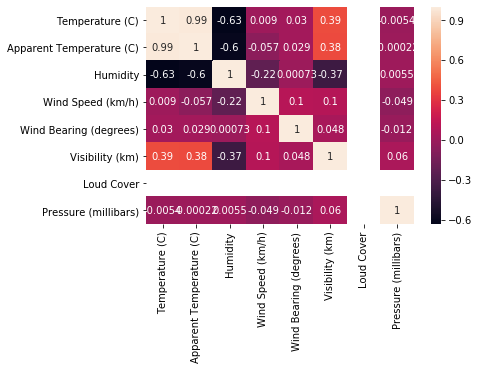

In [128]:
# observing correlation of all features with the label 
sns.heatmap(data.corr(), annot=True)       
plt.show()  # we can see that Temperature, Humidity & Visibility have significant relationship with Apparent Temperature

In [129]:
# choosing only required columns from data
data = data.loc[:,['Apparent Temperature (C)','Temperature (C)', 'Humidity', 'Visibility (km)']]
data.head()

,Apparent Temperature (C),Temperature (C),Humidity,Visibility (km)
0,7.388889,9.472222,0.89,15.8263
1,7.227778,9.355556,0.86,15.8263
2,9.377778,9.377778,0.89,14.9569
3,5.944444,8.288889,0.83,15.8263
4,6.977778,8.755556,0.83,15.8263


In [130]:
data.describe()      # observings all columns' statistical summary

,Apparent Temperature (C),Temperature (C),Humidity,Visibility (km)
count,96453.000000,96453.000000,96453.000000,96453.000000
mean,10.855029,11.932678,0.734899,10.347325
std,10.696847,9.551546,0.195473,4.192123
min,-27.716667,-21.822222,0.000000,0.000000
25%,2.311111,4.688889,0.600000,8.339800
50%,12.000000,12.000000,0.780000,10.046400
75%,18.838889,18.838889,0.890000,14.812000
max,39.344444,39.905556,1.000000,16.100000


#### Handling Outliers

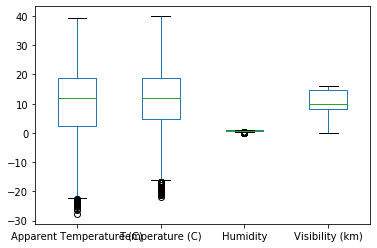

In [131]:
data.plot(kind='box')              # observing outliers of each column
plt.show()                      # we can see that ouliers are at lower end

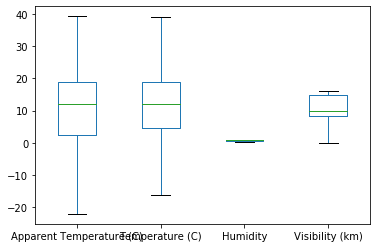

In [132]:
# removing outliers from columns
for col in data.columns:
    quartile1 = data[col].quantile(0.25)
    quartile3 = data[col].quantile(0.75)
    IQR = quartile3 - quartile1        # Inter-quartile range
    # getting indices of outliers as we can see ouliers are at lower end only getting those only
    outliers = data.loc[data[col] < (quartile1 - 1.5*IQR)].index
    data = data.drop(outliers)

data.plot(kind='box')
plt.show()

In [133]:
data['Apparent Temperature (C)'] = data['Apparent Temperature (C)'] + 273.15
data['Temperature (C)'] = data['Temperature (C)'] + 273.15

In [134]:
# rescaling both temperatures to kelvin
data.rename(columns={'Temperature (C)':'Temperature (K)', 'Apparent Temperature (C)':'Apparent Temperature (K)'},inplace=True)

#### Scaling of all features

In [135]:
for col in ['Temperature (K)','Humidity', 'Visibility (km)']:
    minimum = data[col].min()
    maximum = data[col].max()
    data[col]= (data[col] - minimum)*100/(maximum - minimum)
    
data.head()

,Apparent Temperature (K),Temperature (K),Humidity,Visibility (km)
0,280.538889,46.435414,86.746988,98.3
1,280.377778,46.223656,83.132530,98.3
2,282.527778,46.263991,86.746988,92.9
3,279.094444,44.287587,79.518072,98.3
4,280.127778,45.134617,79.518072,98.3


#### Splitting data into train & test set

In [136]:
# Splitting 70 % dataset into train set & 30 % dataset into dataset into test set
train = data.sample(frac=0.7, random_state=3)   # selecting random 0.7 fraction of dataset as train set   
# chossing different random state will give different random rows
test = data.drop(train.index)            # selecting remaining i.e. 30% as test set
print('Train set')
print(train.shape)
train.head()

Train set
(67454, 4)


,Apparent Temperature (K),Temperature (K),Humidity,Visibility (km)
75510,276.411111,38.267621,83.132530,54.9
79242,285.861111,52.314208,38.554217,100.0
81295,278.116667,38.257538,62.650602,42.5
60218,282.250000,46.848845,87.951807,95.6
21152,271.750000,26.701623,100.000000,1.0


In [137]:
print('Test set')
print(test.shape)
test.head()

Test set
(28909, 4)


,Apparent Temperature (K),Temperature (K),Humidity,Visibility (km)
1,280.377778,46.223656,83.132530,98.3
2,282.527778,46.263991,86.746988,92.9
6,278.672222,43.279218,93.975904,62.0
7,279.677778,45.164868,86.746988,62.0
8,283.972222,48.885752,78.313253,62.0


### Building model

In [193]:
total= len(train)                # total records in train set
# initialising parameters
theta0 = 0
theta1 = 0
theta2 = 0
theta3 = 0

# creating row matrix of parameters
theta = np.array([theta0, theta1, theta2, theta3])

# creating matrix of independent variables
x_values = np.ones(total)
x_values = np.append(x_values, train['Temperature (K)'])
x_values = np.append(x_values, train['Humidity'])
x_values = np.append(x_values, train['Visibility (km)'])
x_values = x_values.reshape(4, total)

y_values = np.array(train['Apparent Temperature (K)'])

# prediction function
predict = lambda x_values: theta.dot(x_values)

# derivative of cost functions
def der_cost0():
    return (predict(x_values) - y_values).sum()/total

def der_cost1():
    return (predict(x_values) - y_values).dot(x_values[1])/total

def der_cost2():
    return (predict(x_values) - y_values).dot(x_values[2])/total

def der_cost3():
    return (predict(x_values) - y_values).dot(x_values[3])/total

alpha = 0.0001
iterations = 150000

# applying gradient descent alogorithm
for _ in range(iterations):
    temp0 = theta0 - alpha * der_cost0()
    temp1 = theta1 - alpha * der_cost1()
    temp2 = theta2 - alpha * der_cost2()
    temp3 = theta3 - alpha * der_cost3()
    theta0 = temp0
    theta1 = temp1
    theta2 = temp2
    theta3 = temp3
    theta = np.array([theta0, theta1, theta2, theta3])



In [194]:
print(f'theta0: {theta0}   theta1: {theta1}')
print(f'theta2: {theta2}   theta3: {theta3}')

theta0: 60.30971256504953   theta1: 2.1144455470862558
theta2: 1.2963164319801734   theta3: 0.37656335794775847


### Evaluating accuracy of model against test set

In [195]:
# making predictor variable matrix & target varible array for test set
test_x_values =  np.ones(len(test))
test_x_values = np.append(test_x_values, test['Temperature (K)'])
test_x_values = np.append(test_x_values, test['Humidity'])
test_x_values = np.append(test_x_values, test['Visibility (km)'])
test_x_values = test_x_values.reshape(4, len(test))

test_y_values = np.array(test['Apparent Temperature (K)'])

In [198]:
total_error = abs(predict(test_x_values) - test_y_values)/test_y_values
(1- total_error.sum()/len(test))*100

92.66573279325594